In [1]:
first_time = 0

# Change Directory - Revise for your file system.

In [2]:
import re
s = %pwd
if not re.search('Downloads$',s):
    %cd Downloads

[WinError 2] 系统找不到指定的文件。: 'Downloads'
C:\Users\think\Desktop\jupiter_file\new\new1.0


# Usual Package Imports

In [3]:
import networkx as nx, numpy as np, matplotlib.pyplot as plt, sys, shelve
import graphutils as gutils, make_graph_dict as mkgraph
from datetime import datetime,date
from collections import defaultdict
from functools import reduce
from importlib import reload
today = re.sub('-','_',str(date.today()))
today,nx.__version__

('2020_05_05', '2.3')

In [4]:
WRITE = False

## Open a shelve and load a graph and a term dictionary

In [5]:
with shelve.open('definitions') as f:
    graphdict = dict([(k,v) for k,v in f.items()])
print(graphdict.keys())

dict_keys(['graph', 'term_dictionary', 'termdefdict', 'acrodict', 'racrodict', 'formuladict'])


In [6]:
term = 'Senior Reduction Amount'
term0 = 'Tranche Write-up Amount' # a second term
baseobjs = [graphdict[k] for k in 'graph term_dictionary termdefdict acrodict racrodict formuladict'.split()]
graph,termdict,termdefdict,acrodict,racrodict,formuladict = baseobjs

In [7]:
print('\n\n-----\n\n'.join([str(obj[term]) for obj in (acrodict,termdict,termdefdict,formuladict)]))

SenRedAm

-----

[(1823, 'Related Definitions The "Senior Reduction Amount" with respect to any Payment Date and Loan Group is either: (A) if any of the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group is not satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) 100% of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group; or (B) if the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group are satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) the Senior Percentage of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group.')]

-----

Senior Reduction Amount: Related Definitions The "Senior Reduction Amount" with respect to any Payme

In [8]:
g = graph.copy()

In [9]:
graph.__dict__.keys()

dict_keys(['graph_attr_dict_factory', 'node_dict_factory', 'node_attr_dict_factory', 'adjlist_outer_dict_factory', 'adjlist_inner_dict_factory', 'edge_attr_dict_factory', 'graph', '_node', '_adj', '_pred', '_succ'])

In [10]:
list(g.in_edges(term))

[('Payment Date', 'Senior Reduction Amount'),
 ('Recovery Principal', 'Senior Reduction Amount'),
 ('Unscheduled Principal', 'Senior Reduction Amount'),
 ('Scheduled Principal', 'Senior Reduction Amount'),
 ('Minimum Credit Enhancement Test', 'Senior Reduction Amount'),
 ('Delinquency Test', 'Senior Reduction Amount')]

In [11]:
termdict['Credit Event Net Gain']
termdict[term]

[(1823,
  'Related Definitions The "Senior Reduction Amount" with respect to any Payment Date and Loan Group is either: (A) if any of the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group is not satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) 100% of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group; or (B) if the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group are satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) the Senior Percentage of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group.')]

In [12]:
g.in_edges(term)

InEdgeDataView([('Payment Date', 'Senior Reduction Amount'), ('Recovery Principal', 'Senior Reduction Amount'), ('Unscheduled Principal', 'Senior Reduction Amount'), ('Scheduled Principal', 'Senior Reduction Amount'), ('Minimum Credit Enhancement Test', 'Senior Reduction Amount'), ('Delinquency Test', 'Senior Reduction Amount')])

# Eliminate Unecessary Nodes

In [13]:
with open('nodes2delete.txt') as f: # background on how I selected these on request
    xnodes = f.read().split(' ; ')
xnodes

['Reference Pool',
 'Dealer',
 'BofA Merrill',
 'Warrant',
 'Euroclear',
 'Reference Obligations',
 'Closing Date',
 'Participants',
 'Clearstream',
 'Group 1 Notes',
 'Dealer Agreement',
 'Indirect Participants',
 'Group Termination Date',
 'Note Owners',
 'Group 1 Termination Date',
 'Wells Fargo',
 'Euroclear Participants',
 'JP Morgan']

In [14]:
for n in xnodes:
    g.remove_node(n)
    print('removed node %s' % n)

removed node Reference Pool
removed node Dealer
removed node BofA Merrill
removed node Warrant
removed node Euroclear
removed node Reference Obligations
removed node Closing Date
removed node Participants
removed node Clearstream
removed node Group 1 Notes
removed node Dealer Agreement
removed node Indirect Participants
removed node Group Termination Date
removed node Note Owners
removed node Group 1 Termination Date
removed node Wells Fargo
removed node Euroclear Participants
removed node JP Morgan


# Draw Graph

In [15]:
reload(gutils)
GU = gutils.GraphUtils
acro = gutils.acro

In [16]:
acro('',reset = 1) # empty the cache
acrodict = dict([k,acro(k)] for k in termdict.keys()) # a dcitionary
racrodict = dict(((v,k) for k,v in acrodict.items()))
list(acrodict.items())[:5]#,racrodict['RCRNot']

[('RCR Notes', 'RCRNot'),
 ('Exchangeable Notes', 'ExcNot'),
 ('Dealer', 'De'),
 ('Additional Information', 'AddInf'),
 ('Qualified Institutional Buyers', 'QuInsBuy')]

In [17]:
sra,mcet,rprp,twua = [acrodict[k] for k in 'Senior Reduction Amount;Minimum Credit Enhancement Test;Recovery Principal;Tranche Write-up Amount'.split(';')]
sra,mcet,rprp,twua

('SenRedAm', 'MinCrEnhTes', 'RecPr', 'TrWrAm0')

In [18]:
graphs = {}
for k in (sra,mcet,rprp,twua):
    graphs[k] = GU.traceback(g,racrodict[k],num=1)

In [19]:
def draw_g(g,sz = (15,10)):
    plt.figure(1,figsize=sz)
    nx.draw_networkx(g)
    plt.show()

C:\Users\think\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\think\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


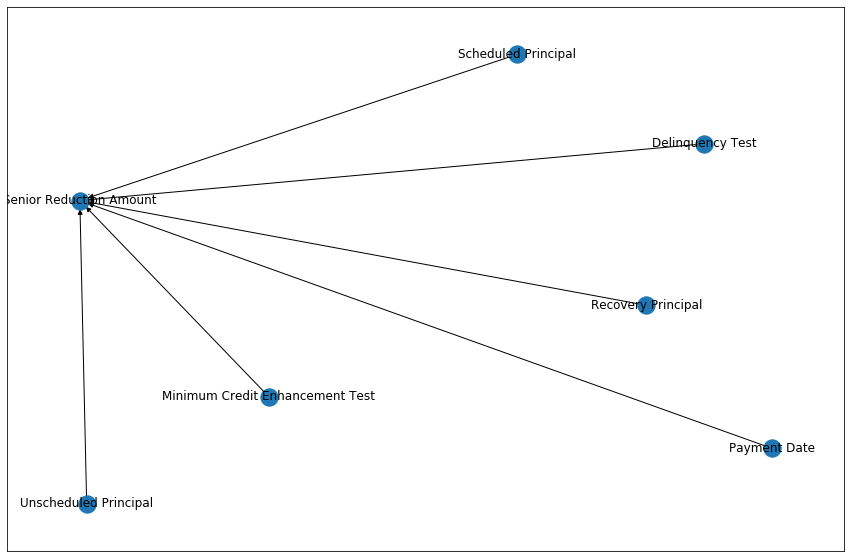

In [20]:
draw_g(graphs[sra])

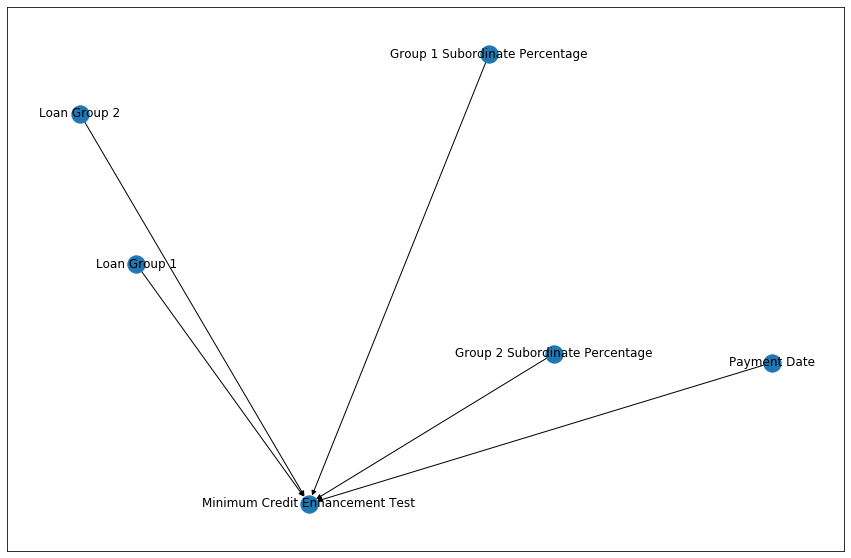

In [21]:
draw_g(graphs[mcet])

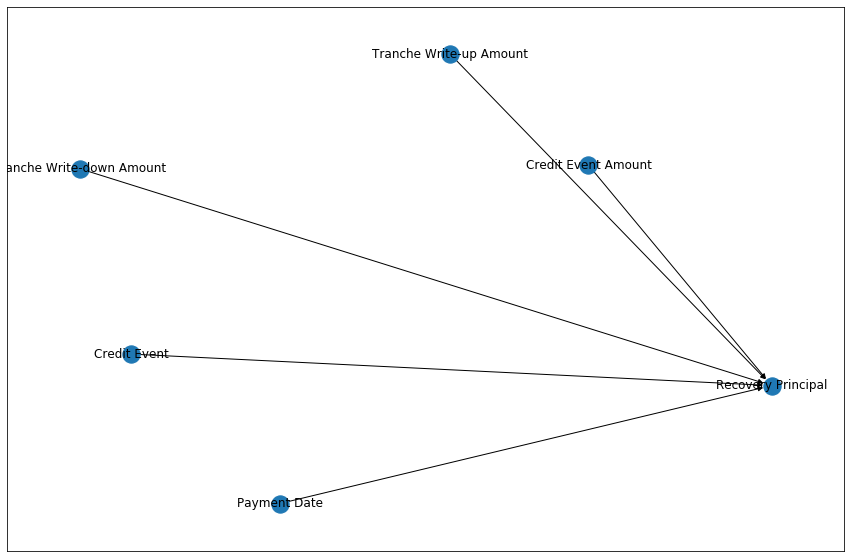

In [22]:
draw_g(graphs[rprp])

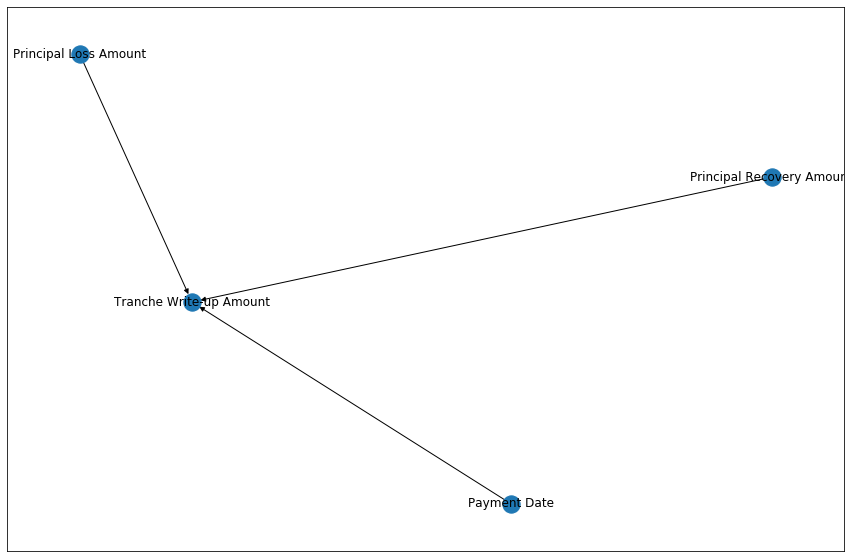

In [23]:
draw_g(graphs[twua])

In [24]:
termdict['Minimum Credit Enhancement Test'],termdict['Group 1 Subordinate Percentage'],termdict['Group 1 Senior Percentage']

([(1839,
   'The "Minimum Credit Enhancement Test" with respect to any Payment Date and Loan Group is a test that will be satisfied if: (i)in the case of Loan Group 1, the Group 1 Subordinate Percentage (solely for purposes of such test, rounded to the sixth decimal place) is greater than or equal to 4.750000%, and (ii)in the case of Loan Group 2, the Group 2 Subordinate Percentage (solely for purposes of such test, rounded to the sixth decimal place) is greater than or equal to 4.750000%.')],
 [(1827,
   'The "Group 1 Subordinate Percentage" with respect to any Payment Date and the Group 1 Notes is the percentage equal to 100% minus the Group 1 Senior Percentage for such Payment Date.')],
 [(1825,
   'The "Group 1 Senior Percentage" with respect to any Payment Date and the Group 1 Notes, is the percentage equivalent of a fraction, the numerator of which is the Class Notional Amount of the Class 1A-H Reference Tranche immediately prior to such Payment Date and the denominator of which 

In [25]:
print(formuladict[term0])

TrWrAm: [Tranche Write-up Amount]: (PayDat, PrLosAm, PrRecAm)
	PayDat: [Payment Date]: (GlAg, BusDay, DefNot, BoNot, RecDat)
		GlAg: [Global Agent]: (GlAgAgr, WelFarBan, WelFar)
		BusDay: [Business Day]: (GlAg)
		DefNot: [Definitive Notes]: (BoNot)
		BoNot: [Book-Entry Notes]: (NotOwn, ClDat, Cl, Eur)
		RecDat: [Record Date]: (PayDat, GlAg, BusDay, DefNot, BoNot)
	PrLosAm: [Principal Loss Amount]: (PayDat, ModLosAm, RefObl, Per, CrEvRefObl, CrEv, LiqPr, RepPer, CrEvNetLos, NetLiqPr)
		PayDat: [Payment Date]: (GlAg, BusDay, DefNot, BoNot, RecDat)
		ModLosAm: [Modification Loss Amount]: (PayDat, OrAccRat, ModEv, CurAccRat)
		RefObl: [Reference Obligations]: (CutDat, RefPo)
		Per: [Period]: (WelFarBan, WelFar)
		CrEvRefObl: [Credit Event Reference Obligation]: (PayDat, CrEv)
		CrEv: [Credit Event]: (PayDat, Per, RepPer, GrTerDat)
		LiqPr: [Liquidation Proceeds]: (CrEvRefObl, CrEv)
		RepPer: [Reporting Period]: (PayDat, Per)
		CrEvNetLos: [Credit Event Net Loss]: (CrEvRefObl, CurAccRat, Cr

TrWrAm: [Tranche Write-up Amount]: max(PrRecAm - PrLosAm,0)



## How the formula works

TrWrAm: [Tranche Write-up Amount]: max (PrRecAm - PrLosAm,0)

Suppose PrRecAm, PrLosAm = 10,5

Then TrWrAm = max( 10 - 5,0) = 5

But suppose  PrRecAm, PrLosAm = 5,10

Then TrWrAm = max(5 - 10 ,0) = 0

In [26]:
print('''TrWrAm: [Tranche Write-up Amount]: max (PrRecAm - PrLosAm,0)
	PrRecAm: [Principal Recovery Amount]: sum(CrEvNetLos,CrEvNetGa,RepWarSetAm)
		CrEvNetGa: [Credit Event Net Gain]: max(NetLiqPr – sum(CrEvUPB,see_def),0)
			CrEvUPB: [Credit Event UPB]: (CrEv, PayDat, Per, RepPer, CrEvRefObl)
			NetLiqPr: [Net Liquidation Proceeds]:  sum(LiqPr, MorInsCrAm,see_def)
		NetLiqPr: [Net Liquidation Proceeds]: sum(LiqPr,MorInsCrAm), less expensese
			LiqPr: [Liquidation Proceeds]: (CrEvRefObl, CrEv)
			MorInsCrAm: [Mortgage Insurance Credit Amount]: (CrEvRefObl, CrEv)
		LiqPr: [Liquidation Proceeds]: (CrEvRefObl, CrEv)
			CrEvRefObl: [Credit Event Reference Obligation]: (CrEv,
		CrEvNetLos: [Credit Event Net Loss]: max(sum(CrEvUPB,see_def) - NetLiqPr, 0)
			NetLiqPr: [Net Liquidation Proceeds]: above
			CrEvUPB: [Credit Event UPB]: above
	PrLosAm: [Principal Loss Amount]: sum(CrEvNetLos, cramdowns, parts of ModLosAm)
		ModLosAm: [Modification Loss Amount]: (CurAccRat, ModEv, OrAccRat, PayDat)
			CurAccRat: [Current Accrual Rate]: (PayDat, ModEv)
			ModEv: [Modification Event]: (PayDat, OrAccRat, ModLosAm, CurAccRat)
			OrAccRat: [Original Accrual Rate]: (CutDat)
			PayDat: [Payment Date]: (BusDay, GlAg, RecDat, BoNot, DefNot)
		CrEvNetLos: [Credit Event Net Loss]: (NetLiqPr, CurAccRat, CrEv, CrEvUPB, CrEvRefObl, LiqPr)
			NetLiqPr: [Net Liquidation Proceeds]: above
			CrEvUPB: [Credit Event UPB]: above
			LiqPr: [Liquidation Proceeds]: above
		CrEvRefObl: [Credit Event Reference ''')

TrWrAm: [Tranche Write-up Amount]: max (PrRecAm - PrLosAm,0)
	PrRecAm: [Principal Recovery Amount]: sum(CrEvNetLos,CrEvNetGa,RepWarSetAm)
		CrEvNetGa: [Credit Event Net Gain]: max(NetLiqPr – sum(CrEvUPB,see_def),0)
			CrEvUPB: [Credit Event UPB]: (CrEv, PayDat, Per, RepPer, CrEvRefObl)
			NetLiqPr: [Net Liquidation Proceeds]:  sum(LiqPr, MorInsCrAm,see_def)
		NetLiqPr: [Net Liquidation Proceeds]: sum(LiqPr,MorInsCrAm), less expensese
			LiqPr: [Liquidation Proceeds]: (CrEvRefObl, CrEv)
			MorInsCrAm: [Mortgage Insurance Credit Amount]: (CrEvRefObl, CrEv)
		LiqPr: [Liquidation Proceeds]: (CrEvRefObl, CrEv)
			CrEvRefObl: [Credit Event Reference Obligation]: (CrEv,
		CrEvNetLos: [Credit Event Net Loss]: max(sum(CrEvUPB,see_def) - NetLiqPr, 0)
			NetLiqPr: [Net Liquidation Proceeds]: above
			CrEvUPB: [Credit Event UPB]: above
	PrLosAm: [Principal Loss Amount]: sum(CrEvNetLos, cramdowns, parts of ModLosAm)
		ModLosAm: [Modification Loss Amount]: (CurAccRat, ModEv, OrAccRat, PayDat)
			Cur